## **Описание проекта: оценка рисков невозврата кредита**

В вашем распоряжении данные клиентов банка «Скрудж», которые планируют взять кредит. Вам необходимо выяснить, что из имеющихся данных влияет на своевременное погашение кредита и каким именно образом.

Исследование поможет в создании модели кредитного скоринга — системы для оценки способности потенциального заёмщика погасить свой кредит.

По каждому клиенту есть информация о его семейном положении, образовании, доходе и другие данные. Вам предстоит подготовить данные к анализу и исследовать их, в процессе отвечая на вопросы.

### Описание данных

- `children` — количество детей в семье;
- `days_employed` — сколько дней работает клиент;
- `dob_years` — возраст клиента;
- `education` — уровень образования клиента;
- `education_id` — идентификатор образования клиента;
- `family_status` — семейное положение клиента;
- `family_status_id` — идентификатор семейного положения клиента;
- `gender` — пол клиента;
- `income_type` — тип дохода клиента;
- `debt` — был ли у клиента когда-либо просрочен платёж по кредиту;
- `total_income` — ежемесячный доход;
- `purpose` — причина оформления кредита.




## Шаг 1. Откройте файл с данными и изучите общую информацию

1. Загрузите датасет.
2. Сделайте копию датасета.
3. Изучите типы данных и определите, соответствуют ли они содержимому. 
4. Напишите вывод.



In [1]:
# Импортируем библиотеки для работы с таблицами и графиками
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
# Загрузите датасет в переменную df_raw или другую по вашему выбору.
# Он доступен по адресу <https://code.s3.yandex.net/datasets/credit_scoring_eng.csv>
# а при работе на платформе по адресу /datasets/credit_scoring_eng.csv
df_raw = pd.read_csv('/datasets/credit_scoring_eng.csv')

In [3]:
# При помощи метода .copy() скопируем датасет для работы с ним в переменную df
df = df_raw.copy()

In [4]:
display(df.head(20)) #выведем первые 20 строк датафрейма

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
5,0,-926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house
6,0,-2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions
7,0,-152.779569,50,SECONDARY EDUCATION,1,married,0,M,employee,0,21731.829,education
8,2,-6929.865299,35,BACHELOR'S DEGREE,0,civil partnership,1,F,employee,0,15337.093,having a wedding
9,0,-2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family


Глядя на первые 20 строк датафрейма, уже можно сказать о существовании некорректных значений в столбце ['days_employed'] и неявных дубликатов в столбце ['education'].

In [5]:
print(df.shape) # выведем количество строк и столбцов датафрейма (в датафрейме 21525 строк и 12 столбцов)

(21525, 12)


In [6]:
print(df.info()) # выведем основную информацию о датафрейме 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB
None


Датафрейм содержит 21525 строк и 12 столбцов, в столбцах 'days_employed' и 'total_income' есть пропуски, также указаны типы данных всех столбцов датафрейма

In [7]:
print(df.count()) #выведем количество непустых строк в датафрейме

children            21525
days_employed       19351
dob_years           21525
education           21525
education_id        21525
family_status       21525
family_status_id    21525
gender              21525
income_type         21525
debt                21525
total_income        19351
purpose             21525
dtype: int64


In [8]:
display(df.sample(10)) #выведем 10 случайных строк датафрейма (видны пропуски в столбце 'days_employed',
#'total_income' и некорректные значения в столбце 'days_employed', видны неявные дубликаты в столбце 'education')

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
19413,0,-2300.843888,64,secondary education,1,widow / widower,2,F,employee,0,20775.559,building a property
17192,0,-222.049875,42,bachelor's degree,0,married,0,M,employee,0,112109.852,university education
4904,0,-1124.128998,27,bachelor's degree,0,divorced,3,F,civil servant,0,40461.158,to get a supplementary education
20969,0,-1914.805430,47,bachelor's degree,0,married,0,F,business,0,27435.130,building a real estate
13564,0,348842.724579,56,secondary education,1,married,0,F,retiree,0,17623.151,construction of own property
21327,0,-592.549543,25,secondary education,1,civil partnership,1,M,employee,1,20518.483,to have a wedding
20620,0,-8437.660236,44,secondary education,1,married,0,F,employee,0,19219.929,buying a second-hand car
16303,0,384011.908613,62,secondary education,1,unmarried,4,F,retiree,0,20920.004,housing renovation
196,0,-1589.781401,37,bachelor's degree,0,married,0,F,business,0,25720.728,purchase of my own house
6482,0,-2088.072298,40,secondary education,1,married,0,F,employee,0,12612.604,housing renovation


In [9]:
df.dtypes #выведем типы данных столбцов датафрейма

children              int64
days_employed       float64
dob_years             int64
education            object
education_id          int64
family_status        object
family_status_id      int64
gender               object
income_type          object
debt                  int64
total_income        float64
purpose              object
dtype: object

Вывод: датафрейм df содержит 21525 строк и 12 столбцов, в столбцах 'days_employed' и 'total_income' есть пропуски, также видно, что значения в столбце 'days_employed' некорректные, видны неявные дубликаты в столбце 'education'. При рассмотрении типов данных всех столбцов датафрейма видно, что тип данных float64 для столбца 'days_employed' некорректен. 


## Шаг 2. Выполните предобработку данных




1. Найдите и изучите пропущенные значения в столбцах. 
2. Устраните пропущенные значения: удалите или замените их. 
3. Объясните выбранную стратегию обработки пропущенных значений.



In [10]:
print(df.isna().sum()) #найдем и выведем количество пропусков в датафрейме (их 2174 в столбцах 'days_employed','total_income')

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64


In [11]:
#подсчитаем долю строк с пропусками
print(df.isna().mean().apply(lambda x: f'{x:.1%}'))

children             0.0%
days_employed       10.1%
dob_years            0.0%
education            0.0%
education_id         0.0%
family_status        0.0%
family_status_id     0.0%
gender               0.0%
income_type          0.0%
debt                 0.0%
total_income        10.1%
purpose              0.0%
dtype: object


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>👍 отличный способ посмотреть долю пропусков
</div>

Доля пропусков в столбцах 'days_employed' и 'total_income' составляет 10.1%. Это достаточно много для удаления строк с данными пропусками, поэтому при удалении потеряется большая доля данных. В остальных столбцах пропусков нет. 

In [12]:
#выведем уникальные данные столбцов 'days_employed','total_income' 
print(df['days_employed'].unique()) 
print(df['total_income'].unique())

[-8437.67302776 -4024.80375385 -5623.42261023 ... -2113.3468877
 -3112.4817052  -1984.50758853]
[40620.102 17932.802 23341.752 ... 14347.61  39054.888 13127.587]


В данных столбца 'days_employed' присутствуют отрицательные значения и нереалистично большие значения, что не соответствует содержимому столбца и данные являются некорректными, в связи с этим возьмем данные в столбе по модулю.

In [13]:
df['days_employed'] = abs(df['days_employed']) #заменим знак у отрицательных значений на противоположный, так как отрицательные значения не соответствуют содержимому столбца, для этого берем все значения по модулю
print(df['days_employed'])

0          8437.673028
1          4024.803754
2          5623.422610
3          4124.747207
4        340266.072047
             ...      
21520      4529.316663
21521    343937.404131
21522      2113.346888
21523      3112.481705
21524      1984.507589
Name: days_employed, Length: 21525, dtype: float64


In [14]:
print(df['days_employed'].describe()) #узнаем общую информацию о распределении значений в столбце days_employed


count     19351.000000
mean      66914.728907
std      139030.880527
min          24.141633
25%         927.009265
50%        2194.220567
75%        5537.882441
max      401755.400475
Name: days_employed, dtype: float64


In [15]:
Q3 = 5537.882441 
Q1 = 927.009265
IQR = Q3 - Q1 #найдем показатель размаха данных в столбце days_employed
upper_bound = Q3 + 1.5*IQR #найдем верхний порог значений в столбце days_employed
filtered = df.query('days_employed >= @upper_bound').count()/len(df)*100 #найдем долю значений выше верхнего порога
print(filtered)

children            16.334495
days_employed       16.334495
dob_years           16.334495
education           16.334495
education_id        16.334495
family_status       16.334495
family_status_id    16.334495
gender              16.334495
income_type         16.334495
debt                16.334495
total_income        16.334495
purpose             16.334495
dtype: float64


Так как доля строк со значениями больше верхнего порога достаточно большая, отфильтровать данные строки будет неправильно, поэтому оставим их, а пропуски в данном столбце оставим нетронутым, так как многие значени некорректны и требуется дальнейшее их уточнее и анализ. Пропуски могли возикнуть в связи с отсутствием опыта работы.

In [16]:
df['total_income'].fillna(df['total_income'].median(), inplace=True) #заменим пропуски в данных столбца 'total_income' на медианное значение 
print(df.isna().sum()) #убедимся, что пропусков в столбце не осталось

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income           0
purpose                0
dtype: int64


Пропуски могли возникнуть в связи с тем, что человек не имеет работы какой-то причине (например, несовершеннолетний, безработный, на пенсии). 


1. Изучите уникальные значения в столбцах с уровнем образования (`education`) и полом клиента (`gender`). 
2. Устраните неявные дубликаты и некорректные значения.



In [17]:
## Изучим уникальные значения в столбце education (видно наличие неявных дубликатов)
print(df['education'].unique())
# Изучим уникальные значения в столбце gender (видно наличие некорректного значения)
print(df['gender'].unique())

["bachelor's degree" 'secondary education' 'Secondary Education'
 'SECONDARY EDUCATION' "BACHELOR'S DEGREE" 'some college'
 'primary education' "Bachelor's Degree" 'SOME COLLEGE' 'Some College'
 'PRIMARY EDUCATION' 'Primary Education' 'Graduate Degree'
 'GRADUATE DEGREE' 'graduate degree']
['F' 'M' 'XNA']


In [18]:
df['education'] = df['education'].str.lower() #приведем данные к стандартизированному виду 
df = df[df['gender'] != 'XNA'] # отфильтруем данные с некорректными значениями
display(df[{'education','gender'}])

,gender,education
0,F,bachelor's degree
1,F,secondary education
2,M,secondary education
3,M,secondary education
4,F,secondary education
...,...,...
21520,F,secondary education
21521,F,secondary education
21522,M,secondary education
21523,M,secondary education


In [19]:
#найдем долю явных дубликатов от  всех данных
total_dupl = df.duplicated().sum()
share_dupl = df.duplicated().mean()
print(f'Количество дубликатов в данных = {total_dupl}, что составляет {share_dupl:.2%} от всех данных.') #доля данных достаточна мала, поэтому можно удалить данные дубликаты df = df.drop_duplicates() 

Количество дубликатов в данных = 71, что составляет 0.33% от всех данных.


In [20]:
df = df.drop_duplicates() #так как доля дубликатов очень мала, удалим их 


1. Проверьте наличие дубликатов. Изучите дублированные данные, если они есть, и примите решение — удалять их или оставить.



In [21]:
#проверим, что дубликатов не осталось 
print('Количество дубликатов:', df.duplicated().sum())
#найдем долю дубликатов через mean 
print('Доля дубликатов:', df.duplicated().mean())

Количество дубликатов: 0
Доля дубликатов: 0.0


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Проверка на дубликаты выполнена!
</div>


Шаг 3. Выбросы и аномальные значения

Изучите столбцы `total_income`, `dob_age`, `chidlren` на наличие выбросов и аномальных значений, в том числе при помощи графиков. Если выбросы или аномалии будут обнаружены — обоснованно примите решение об их судьбе. Используйте подзаголовки третьего уровня (`### Подзаголовок`), чтобы создать структуру действий в рамках этого шага.



In [22]:
# Изучим столбец total_income на наличие выбросов и аномальных значений
print(df['total_income'].describe())
# Изучим столбец dob_years на наличие выбросов и аномальных значений
print(df['dob_years'].describe())
# Изучим столбец children на наличие выбросов и аномальных значений
print(df['children'].describe())

count     21453.000000
mean      26435.894561
std       15683.670226
min        3306.762000
25%       17219.352000
50%       23202.870000
75%       31327.922000
max      362496.645000
Name: total_income, dtype: float64
count    21453.000000
mean        43.272130
std         12.570427
min          0.000000
25%         33.000000
50%         42.000000
75%         53.000000
max         75.000000
Name: dob_years, dtype: float64
count    21453.000000
mean         0.539971
std          1.383471
min         -1.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         20.000000
Name: children, dtype: float64


На основании описания данных столбца total_income можно отметить, что среднее и медианное значения различаются, если посмотреть на 75% процентиль и максимальное значение, видно, что присутствуют выбросы или аномалии более 31327. Можно построить boxplot или гистограмму для наглядного представления распределения. Возраст содержит контекстные выбросы и аномальные значения, так как должниками не могут быть люди младше 18 лет, а в столбце присутствуют нулевые значения (хотя среднее и медианное значение различаются несильно). В столбце children  есть также контекстные выбросы и аномалии, это отрицательные значения и значение "20" для количества детей. Необходимо проанализировать эти данные более подробно.

In [23]:
print(df[['children', 'dob_years','total_income']].corr())

              children  dob_years  total_income
children      1.000000  -0.173752      0.016740
dob_years    -0.173752   1.000000     -0.050403
total_income  0.016740  -0.050403      1.000000


Матрица корреляции отображает значения очень слабой положительной корреляции между столбцами total_income и children ( 0.016740), слабой отрицательной корреляции между столбцами dob_years и children и очень слабой отрицательной корреляции между столбцами dob_years и total_income. 

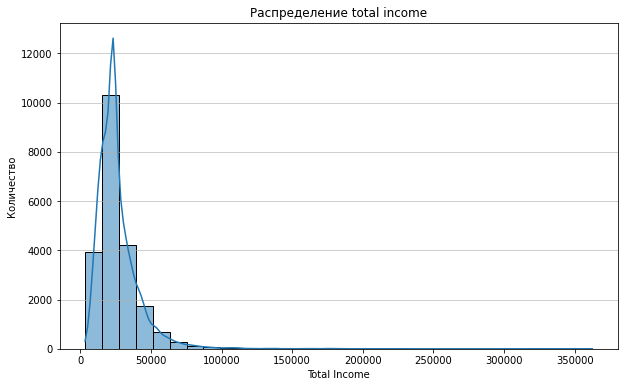

Верхний порог = 52490.774


In [24]:
# Построение histplot для 'total_income'
plt.figure(figsize=(10, 6))
sns.histplot(df['total_income'], bins=30, kde=True)
plt.grid( axis = 'y', alpha = 0.75)
plt.title('Распределение total income')
plt.xlabel('Total Income')
plt.ylabel('Количество')
plt.show()

IQR = 31327.92 - 17219.352000
upper_bound = 31327.922000 + 1.5*IQR
print(f'Верхний порог = {upper_bound}')
filtered_df = df[(df['total_income'] >= 3306.762000) & (df['total_income'] < upper_bound)] #отфильтруем данные выше верхнего порога 


На гистограмме видны  выбросы значений total_income больше 52490.774 

In [25]:
filtered_total_income = df.query('total_income > 52490.774') #отобразим данные выше ерхнего порога
filtered_ratio_total_income = len(filtered_total_income) / len(df) #посчитаем какова доля данных выше верхнего порога
print(f'Доля данных выше верхнего порога:{filtered_ratio_total_income:.2%}')

Доля данных выше верхнего порога:5.22%


Доля данных выше верхнего порога в столбце total_income небольшая, поэтому можно отфильтровать эти данные

In [27]:
df = df.query('total_income < 52490.774') #отфильтруем данные выше ерхнего порога в столбце total_income 
display(df)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions
21521,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car
21522,1,2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property
21523,3,3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car


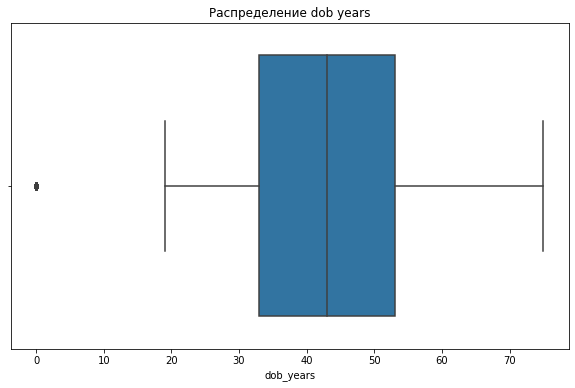

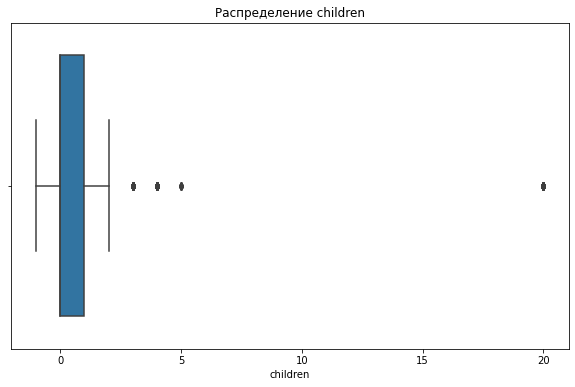

In [28]:
# Построение boxplot для dob_years
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['dob_years'])
plt.title('Распределение dob years')
plt.show()
# Построение boxplot для children
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['children'])
plt.title('Распределение children')
plt.show()


На графике boxplot по столбцу dob_years видны выбросы и аномалии менее 18 лет

In [29]:
filtered_dob_years = df.query('dob_years < 18') #отобразим данные с возрастом менее 18 лет в столбце 'dob_years'
filtered_ratio_dob_years = len(filtered_dob_years) / len(df) #посчитаем какова доля данных с возрастом меньше 18 лет, данные аномальны, так как кредит не можеь выдаваться людям младше 18 лет 
print(f'Доля данных с возрастом меньше 18 лет:{filtered_ratio_dob_years:.2%}')

Доля данных с возрастом меньше 18 лет:0.49%


Доля данных с возрастом меньше 18 лет очень мала, поэтому можно ее отфильтровать

In [30]:
df = df.query('dob_years >= 18') #отфильтруем данные с возрастом менее 18 лет в столбце 'dob_years' 
display(df)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions
21521,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car
21522,1,2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property
21523,3,3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car


На графике boxplot по столбцу children видны аномалии со значениями менее 0 и выбросы со значениями более 3

In [31]:
filtered_children = df.query('children < 0') #отобразим данные с количеством детей меньше 0 в столбце children
filtered_ratio_children = len(filtered_children) / len(df) #посчитаем какова доля данных с количеством детей меньше 0 (отрицательного числа детей быть не может)
print(f'Доля данных с количеством детей меньше 0:{filtered_ratio_children:.2%}')

Доля данных с количеством детей меньше 0:0.23%


In [32]:
IQR = 1 #
q99 = df['children'].quantile(0.99)
print(q99)
upper_bound = 1 + 1.5*IQR
print(upper_bound)

3.0
2.5


In [33]:
filtered_children_1 = df.query('children > 3') #отобразим данные с количеством детей больше 3 в столбце 'children'
filtered_ratio_children_1 = len(filtered_children_1) / len(df) #посчитаем какова доля данных с количеством детей меньше 0 (отрицательного числа детей быть не может)
print(f'Доля данных с количеством детей больше 3:{filtered_ratio_children_1:.2%}')

Доля данных с количеством детей больше 3:0.59%


Доля данных с количеством детей менее 0 и больше 3 очень мала, поэтому можно ее отфильтровать

In [34]:
df = df.query('children >= 0 and children <= 3') #отфильтруем данные с количеством детей меньше 0 в столбце 'children'
display(df)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions
21521,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car
21522,1,2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property
21523,3,3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car


В результате предобработки были обработаны столбцы 'total_income','education', 'dob_years', 'children', 'days_employed', 'gender'. Были изучены значения в столбцах, пропуски в столбце 'days_employed' оставлены, а в 'total_income' заменены на медианное значение. Значения в столбце 'education' приведены к стандартизированному виду, в столбце 'gender' устранены некорректные значения. Также, устранены явные и неявные дубликаты. Столбцы 'total_income', 'dob_years', 'children' очищены от аномалий и выбросов. Отфильтрованы контекстные выбросы. Доля потерянных данных составила около 6,9 %. 

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Отличное решение!
</div>


## Шаг 4. Добавьте в таблицу новые столбцы




1. **Разделите клиентов на 5 категорий по уровню дохода:**
- Без дохода — люди без работы и с нулевым доходом.
- Очень низкий доход — люди, получающие ниже 14 процентиля от общего распределения дохода.
- Низкий доход — люди, получающие между 14 и 34 процентилями от общего распределения дохода.
- Средний доход — люди, получающие между 34 и 78 процентилями от общего распределения дохода.
- Высокий доход — люди, получающие больше 78 процентиля от общего распределения дохода.



In [35]:
# Добавим столбец с категориями по уровню дохода
# Определение квантилей и меток категорий
income_percentiles = [-1, 0, 0.14, 0.34, 0.78, 1]
income_labels = ['Без дохода', 'Очень низкий доход', 'Низкий доход', 'Средний доход', 'Высокий доход']
# Применение разделения на категории к столбцу 'total_income'
df['income_category'] = pd.qcut(df['total_income'], income_percentiles, labels=income_labels)
display(df['income_category'])

0             Высокий доход
1              Низкий доход
2             Средний доход
3             Высокий доход
4             Средний доход
                ...        
21520         Высокий доход
21521         Средний доход
21522          Низкий доход
21523         Высокий доход
21524    Очень низкий доход
Name: income_category, Length: 20067, dtype: category
Categories (5, object): ['Без дохода' < 'Очень низкий доход' < 'Низкий доход' < 'Средний доход' < 'Высокий доход']


1. Разделите клиентов на две категории по возрасту: до 40 лет и после. Сохраните результат в колонке `age_category`.



In [36]:
# Добавим столбец с категориями по возрасту
df['age_category'] = pd.cut(df['dob_years'], bins=[0, 40, df['dob_years'].max()], labels=['До 40 лет', 'После 40 лет'])
print(df['age_category'])

0        После 40 лет
1           До 40 лет
2           До 40 лет
3           До 40 лет
4        После 40 лет
             ...     
21520    После 40 лет
21521    После 40 лет
21522       До 40 лет
21523       До 40 лет
21524       До 40 лет
Name: age_category, Length: 20067, dtype: category
Categories (2, object): ['До 40 лет' < 'После 40 лет']



1. Разделите клиентов на несколько категорий по количеству детей: без детей, от одного до двух, от трёх и больше. Сохраните результат в колонке `childrens_category`.



In [37]:
# Добавим столбец с категориями по количеству детей
df['children_category'] = pd.cut(df['children'], bins=[-1, 0, 2, df['children'].max()], labels=['Без детей', 'От одного до двух', 'Три и более'])
print(df['children_category'])

0        От одного до двух
1        От одного до двух
2                Без детей
3              Три и более
4                Без детей
               ...        
21520    От одного до двух
21521            Без детей
21522    От одного до двух
21523          Три и более
21524    От одного до двух
Name: children_category, Length: 20067, dtype: category
Categories (3, object): ['Без детей' < 'От одного до двух' < 'Три и более']


In [38]:
#выведем первых 25 строк датафрейма
display(df.head(25))

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,income_category,age_category,children_category
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,Высокий доход,После 40 лет,От одного до двух
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,Низкий доход,До 40 лет,От одного до двух
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,Средний доход,До 40 лет,Без детей
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,Высокий доход,До 40 лет,Три и более
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,Средний доход,После 40 лет,Без детей
5,0,926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house,Высокий доход,До 40 лет,Без детей
6,0,2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions,Высокий доход,После 40 лет,Без детей
7,0,152.779569,50,secondary education,1,married,0,M,employee,0,21731.829,education,Средний доход,После 40 лет,Без детей
8,2,6929.865299,35,bachelor's degree,0,civil partnership,1,F,employee,0,15337.093,having a wedding,Низкий доход,До 40 лет,От одного до двух
9,0,2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family,Средний доход,После 40 лет,Без детей


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Категоризация произведена верно!
</div>


## Шаг 5. Проведите исследовательский анализ данных



Задайте структуру наиболее объёмной части исследования. Исследуйте факторы: `Уровень дохода`, `Образование`, `Возраст`, `Количество детей`. Отличается ли распределение между должниками и нет? Исследуйте вопрос графически. Постройте сводную таблицу по каждому фактору и покажите, как часто встречаются должники в каждой группе клиентов. Выберите подходящую визуализацию и сравните 2 группы.

In [39]:
# Построение сводной таблицы по всем факторам 
pivot_table = pd.pivot_table(df, index=['total_income','education', 'dob_years', 'children'], values='debt', aggfunc='mean')
display(pivot_table)

,,,,debt
total_income,education,dob_years,children,
3306.762,secondary education,57,0,1.0
3392.845,secondary education,37,0,0.0
3418.824,secondary education,52,1,0.0
3471.216,secondary education,68,0,0.0
3503.298,secondary education,61,0,0.0
...,...,...,...,...
52445.270,secondary education,47,0,0.0
52446.084,secondary education,35,0,0.0
52448.412,some college,43,0,0.0


<Figure size 864x432 with 0 Axes>

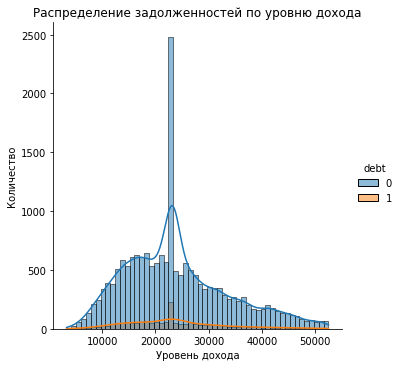

In [40]:
# Построение распределения задолженностей по уровню дохода
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.displot(data=df, x='total_income', hue='debt', kde = True)
plt.title('Распределение задолженностей по уровню дохода')
plt.xlabel('Уровень дохода')
plt.ylabel('Количество')
plt.show()

Больше всего должников с доходом от 14000 до 28000. Особенно много должников с доходом 24000. Чем выше доход, тем меньше должников.

In [41]:
#Построение сводной таблицы по уровню дохода 
pivot_table = pd.pivot_table(data = df, index='total_income', values='debt', aggfunc='count', fill_value=0)
print(pivot_table)

              debt
total_income      
3306.762         1
3392.845         1
3418.824         1
3471.216         1
3503.298         1
...            ...
52445.270        1
52446.084        1
52448.412        1
52448.768        1
52474.024        1

[17991 rows x 1 columns]


<Figure size 1584x1440 with 0 Axes>

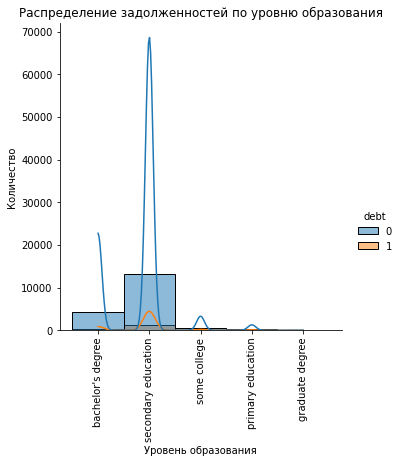

In [42]:
# Построение распределения задолженностей по уровню образования
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(22, 20))
sns.displot(data=df, x='education', hue='debt', kde = True)
plt.title('Распределение задолженностей по уровню образования')
plt.xlabel('Уровень образования')
plt.ylabel('Количество')
plt.xticks(rotation = 90)
plt.show()

Больше всего должников среди людей, получающих дополнительное образование. Также, достаточно много должников среди тех, кто получает степень бакалавра.

In [43]:
#Построение сводной таблицы по уровню образования
pivot_table = pd.pivot_table(data = df, index='education', values='debt', aggfunc='count', fill_value=0)
print(pivot_table)

                      debt
education                 
bachelor's degree     4610
graduate degree          6
primary education      278
secondary education  14478
some college           695


<Figure size 864x432 with 0 Axes>

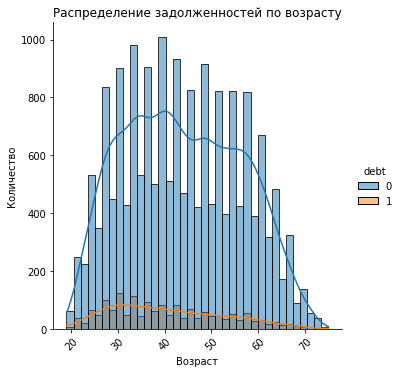

In [44]:
# Построение распределения задолженностей по возрасту
plt.figure(figsize=(12, 6))
sns.displot(data=df, x='dob_years', hue='debt', kde = True)
plt.title('Распределение задолженностей по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.xticks(rotation = 45)
plt.show()

Больше всего должников в возрасте от 24 - 58 лет. Особенно много должников среди людей возраста от 28 до 38 лет. 

In [45]:
#Построение сводной таблицы по возрасту
pivot_table = pd.pivot_table(data = df, index='dob_years', values='debt', aggfunc='count', fill_value=0)
print(pivot_table)

           debt
dob_years      
19           14
20           51
21          107
22          179
23          245
24          254
25          341
26          396
27          455
28          479
29          511
30          502
31          521
32          477
33          536
34          557
35          577
36          508
37          488
38          562
39          530
40          561
41          558
42          546
43          466
44          509
45          464
46          430
47          457
48          498
49          476
50          477
51          412
52          457
53          430
54          454
55          420
56          455
57          437
58          434
59          418
60          364
61          339
62          337
63          260
64          245
65          186
66          178
67          162
68           98
69           82
70           63
71           56
72           33
73            8
74            6
75            1


<Figure size 864x432 with 0 Axes>

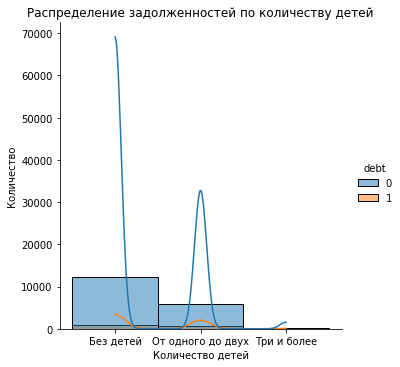

In [46]:
# Построение распределения задолженностей по количеству детей
plt.figure(figsize=(12, 6))
sns.displot(data=df, x='children_category', hue='debt', bins = 3, kde = True)
plt.title('Распределение задолженностей по количеству детей')
plt.xlabel('Количество детей')
plt.ylabel('Количество')
plt.show()

Доля должников без детей чуть больше, чем доля клиентов банка с детьми. Также, доля должников с 1-2 детьми гораздо больше, чем с 3 детьми. 

In [47]:
#Построение сводной таблицы по количеству детей
pivot_table = pd.pivot_table(data = df, index='children', values='debt', aggfunc='count', fill_value=0)
print(pivot_table)

           debt
children       
0         13320
1          4534
2          1910
3           303


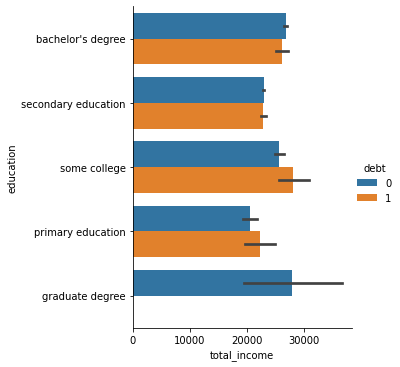

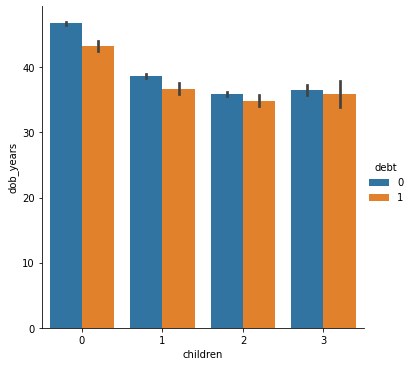

In [49]:
# Визуализация распределения должников по группам
sns.catplot(data=df, x="total_income", hue="debt", y="education", kind="bar")
sns.catplot(data=df, x="children", hue="debt", y= "dob_years", kind="bar")

Рассматривая группировку по уровню образования от уровня дохода, можно сказать, что чаще всего просрочки бывают у людей со средним образованием на уровне колледжа и доходе около 29000, и у людей с высшим образованием на уровне бакалавра и доходом около 27000. Рассматривая группировку по количеству детей от возраста, можно отметить, что чаще всего просрочки бывают у людей в возрасте около 45 лет без детей, и в возрасте около 37 лет с 3 детьми. 

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>У тебя отличные графики и выводы! 
</div>



***Проверьте исследовательскую гипотезу***: у клиентов с детьми более высокий уровень финансовой ответственности и, следовательно, более низкий риск просрочек по кредиту.



Text(0.5, 1.0, 'Зависимость между количеством детей и процентом должников')

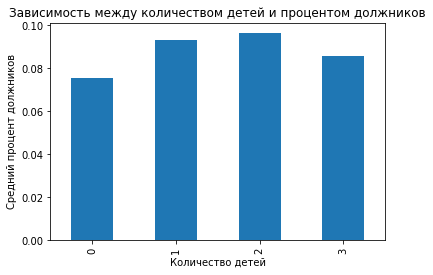

In [50]:
# Группировка данных по наличию детей и вычисление среднего значения должников
children_vs_debt = df.groupby('children')['debt'].mean()

# Визуализация результатов
children_vs_debt.plot(kind='bar')
plt.xlabel('Количество детей')
plt.ylabel('Средний процент должников')
plt.title('Зависимость между количеством детей и процентом должников')


Среди людей без детей самый низкий средний процент должников. Чаще всего должниками становятся люди с 2 детьми. Гипотеза не подтвердилась. 


***Проверьте исследовательскую гипотезу***: одинокие мужчины с низким доходом чаще оказываются должниками, чем семейные мужчины со средним доходом.



In [51]:
# Фильтрация данных для одиноких мужчин с низким доходом
single_low_income_men = df[(df['family_status_id'].isin([2, 3])) & (df['income_category'] == 'Низкий доход')]

# Вычисление среднего значения должников
mean_debt_single_low_income_men = single_low_income_men['debt'].mean()

# Фильтрация данных для семейных мужчин со средним доходом
family_middle_income_men = df[(df['family_status_id'].isin([0, 1])) & (df['income_category'] == 'Средний доход')]

# Вычисление среднего значения должников
mean_debt_family_middle_income_men = family_middle_income_men['debt'].mean()

# Вывод результатов
print(f'Средний процент должников среди одиноких мужчин с низким доходом: {mean_debt_single_low_income_men}')
print(f'Средний процент должников среди семейных мужчин со средним доходом: {mean_debt_family_middle_income_men}')

Средний процент должников среди одиноких мужчин с низким доходом: 0.06157635467980296
Средний процент должников среди семейных мужчин со средним доходом: 0.0846780162842339


Гипотеза не подтвердилась, так как средний процент должников среди семейных мужчин со средним доходом выше, чем Средний процент должников среди одиноких мужчин с низким доходом. 

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>👍
</div>


## Шаг 6. Напишите общий вывод



Проведен анализ данных клиентов банка «Скрудж». В первоначальном виде датафрейм df содержит 21525 строк и 12 столбцов. При первоначальной обработке выявлено, что в столбцах 'days_employed' и 'total_income' есть пропуски, значения в столбце 'days_employed' некорректные, видны неявные дубликаты в столбце 'education'. Доля пропусков в столбцах 'days_employed' и 'total_income' составила 10.1%, что достаточно много для удаления строк с данными пропусками, поэтому при удалении потеряется большая доля данных. В данных столбца 'days_employed' присутствуют отрицательные значения и нереалистично большие значения, что не соответствует содержимому столбца и данные являются некорректными, в связи с этим принято решение взять данные в столбце по модулю. Так как доля строк со значениями больше верхнего порога достаточно большая, отфильтровать данные строки неправильно, поэтому они были оставлены в исходном виде. Многие значения столбца некорректны и требуется дальнейшее их уточнее и анализ. Одной из причин появления пропусков могло быть отсутствие опыта работы. Также, выявлены пропуски в столбце total_income, причиной могло послужить отсутвие постоянного заработка (например, несовершеннолетний, безработный и прочее). Пропуски в столбце 'total_income' были заменены на медианное значение столбца.Так, В результате предобработки были обработаны столбцы 'total_income','education', 'dob_years', 'children', 'days_employed', 'gender'. Значения в столбце 'education' приведены к стандартизированному виду, в столбце 'gender' устранены некорректные значения. Также, устранены явные и неявные дубликаты. Столбцы 'total_income', 'dob_years', 'children' очищены от аномалий и выбросов. Отфильтрованы контекстные выбросы. Доля потерянных данных в процессе предобработки составила около 6,9 %. Далее был добавлен столбец с категориями по уровню дохода, где отображалось разделение клиентов по уровню дохода на 5 категорий: без дохода, очень низкий доход, низкий доход, средний доход, высокий доход. Добавлен столбец с категориями по возрасту и столбец с категориями по количеству детей. Рассматривая различные факторы влияния на просрочку кредита клиентами, были проанализированны факторы: Уровень дохода, Образование, Возраст, Количество детей. Самая сильная корреляция у столбца debt со столбцом children (0.028, что в целом считается слабой корреляцией), со столбцами dob_years слабая отрицательная корреляция (-0.0719), со столбцом total_income также слабая отрицательная коррелция (-0.009). Так, наибольшее влияние на просрочку кредитов оказывает количество детей и возраст клиента банка. Также, в зависимости от рассматриваемого фактора, были сделаны следующие выводы: больше всего должников среди людей, получающих дополнительное образование. Достаточно много должников среди тех, кто имеет степень бакалавра. Больше всего должников с доходом от 14000 до 28000. Особенно много должников с доходом 24000. Чем выше доход, тем меньше должников. Больше всего должников в возрасте от 24 - 58 лет. Особенно много должников среди людей возраста от 28 до 38 лет. Рассматривая группировку по количеству детей от возраста, отмечено, что чаще всего просрочки бывают у людей в возрасте около 45 лет без детей, и в возрасте около 37 лет с 3 детьми.Рассматривая группировку по уровню образования от уровня дохода, выявлено, что чаще всего просрочки бывают у людей со средним образованием на уровне колледжа и доходе около 29000, и у людей с высшим образованием на уровне бакалавра и доходом около 27000. Гипотеза, что у клиентов с детьми более высокий уровень финансовой ответственности и, следовательно, более низкий риск просрочек по кредиту не подтвердилась, так как среди людей без детей самый низкий средний процент должников. Чаще всего должниками становятся люди с 1-2 детьми. Гипотеза, что одинокие мужчины с низким доходом чаще оказываются должниками, чем семейные мужчины со средним доходом, также не подтвердилась, так как средний процент должников среди семейных мужчин со средним доходом выше, чем средний процент должников среди одиноких мужчин с низким доходом. 


---